In [ ]:
# 木の健康状態を予測しよう！ SMBCグループ 
# https://signate.jp/competitions/1247

In [75]:
import pandas as pd
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
sample_submit = pd.read_csv('./data/sample_submission.csv', index_col=0, header=None)

In [76]:
train.head()

,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,English oak,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,English oak,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,honeylocust,...,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,London planetree,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


In [77]:
train['health'].value_counts()

1    15751
0     3535
2      698
Name: health, dtype: int64

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null  int64 
 20  cncldi

In [81]:
train.isnull().sum()

created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

In [82]:
train['steward'].value_counts()

1or2       3999
3or4       1079
4orMore      23
Name: steward, dtype: int64

In [83]:
train['guards'].value_counts()

Helpful    3650
Unsure      737
Harmful     654
Name: guards, dtype: int64

In [84]:
train['problems'].value_counts()

Stones                                  2219
BranchLights                            1036
StonesBranchLights                       762
BranchOther                              408
RootOther                                333
                                        ... 
StonesRootOtherTrunkOtherBranchOther       8
StonesRootOtherWiresRopeBranchOther        5
StonesMetalGratesTrunkOther                4
TrunkLightsBranchLightsBranchOther         4
WiresRopeTrunkLightsBranchLights           4
Name: problems, Length: 73, dtype: int64

In [85]:
train.fillna('NULL', inplace=True)

In [86]:
train['problems'].nunique()
# 上の結果と組み合わせると、73種類の問題とNULL（問題なし）があることが分かる

74

In [87]:
# 問題があるかどうかの2値に変換して分析を進める
train['bool_problems'] = train['problems'].apply(lambda x: 0 if x=='NULL' else 1)
train.head()

,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,...,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist,bool_problems
0,2015-06-29,14,OnCurb,1,NULL,NULL,Damage,Volunteer,NULL,English oak,...,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23,0
1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NULL,crimson king maple,...,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15,0
2,2015-09-13,26,OnCurb,2,NULL,NULL,NoDamage,Volunteer,StonesBranchLights,English oak,...,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51,1
3,2016-05-09,15,OnCurb,0,NULL,NULL,Damage,NYC Parks Staff,NULL,honeylocust,...,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51,0
4,2016-06-24,23,OnCurb,1,NULL,NULL,NoDamage,Volunteer,Stones,London planetree,...,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9,1


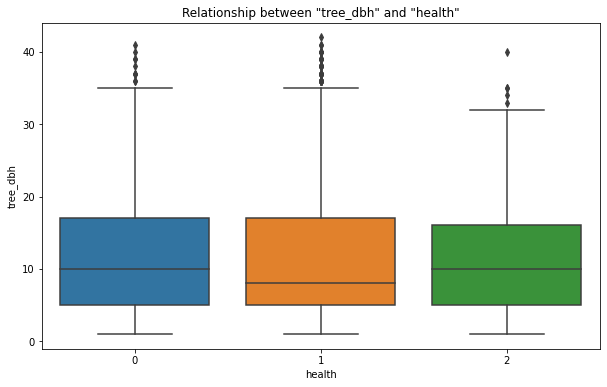

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='tree_dbh', data=train)
plt.title('Relationship between "tree_dbh" and "health"')
plt.show()
# 健康状態によって多少木の直径が関係しているように見て取れる

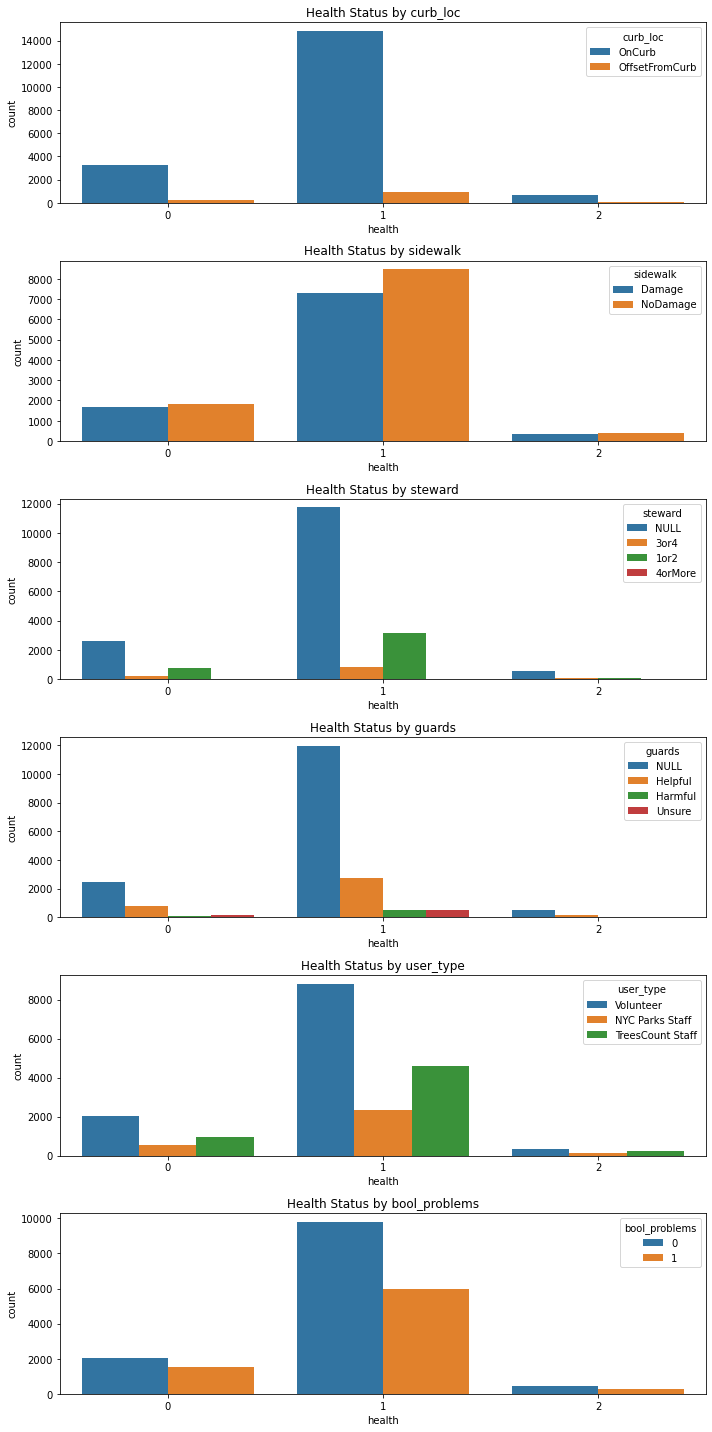

In [89]:
# カテゴリ変数についても目的変数との関係を可視
categorical_features = ['curb_loc', 'sidewalk', 'steward', 'guards', 'user_type', 'bool_problems']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 20))

for i, feature in enumerate(categorical_features):
    sns.countplot(x='health', hue=feature, data=train, ax=axes[i])
    axes[i].set_title(f'Health Status by {feature}')
    axes[i].legend(title=feature, loc='upper right')

plt.tight_layout()
plt.show()

In [90]:
# testデータにも同様の前処理を行っていく
test.fillna('NULL', inplace=True)
test['bool_problems'] = test['problems'].apply(lambda x: 0 if x=='NULL' else 1)

In [91]:
train.shape

(19984, 22)

In [92]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(train, test_size=0.2, stratify=train['health'], random_state=82)
# stratifyを設定することで目的変数の分布を保ったまま分割することができます。

In [93]:
train.shape

(15987, 22)

In [94]:
valid.shape

(3997, 22)

In [95]:
# 使用する特徴量の選択
select_cols = ['tree_dbh', 'curb_loc', 'sidewalk', 'steward', 'guards', 'user_type', 'bool_problems']

# 目的変数とそれ以外に学習用データを分割
x_train = train[select_cols]
y_train = train['health']
x_valid = valid[select_cols]
y_valid = valid['health']

# カテゴリのままでは学習できないのでワンホットエンコーディングで数値化
x_train = pd.get_dummies(x_train)
x_valid = pd.get_dummies(x_valid)
test =pd.get_dummies(test[select_cols])

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

valid_predictions = model.predict(x_valid)
valid_f1 = f1_score(y_valid, valid_predictions, average='macro')
print(f"Validation F1 Score (Macro): {valid_f1}")

Validation F1 Score (Macro): 0.3177502612884841


In [97]:
pred = model.predict(test)
# print(pred[:5])
print(pred)

[1 1 1 ... 1 1 1]


In [98]:
sample_submit[1] = pred
sample_submit.to_csv('./submit/submit.csv', header=None)